In [1]:
import pandas as pd

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# large number library:
from gmpy2 import mpz

# for handling SettingWithCopyWarning
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
data = pd.read_csv("../data/profile_cbrt.csv").drop_duplicates()
data

,input,initial_value,cbrt_ideal,cbrt_implementation_noguess,cbrt_implementation_guess,gas_used_noguess,gas_used_initial_value
0,1,2000000000000,1000000000000,1000000000000,1000000000000,36608,2039
1,0,0,0,0,0,467,467
2,17447,49278845119011,25936234273164,25936234273164,25936234273164,28288,2039
3,323644660184762007500615537352873936970,68657736569204787642368,6865773656920477287841792,6865773656920483309433178,6865773656920483309433178,22047,7240
4,40614,309362568095484,34373618677276,34373618677276,34373618677276,27508,3079
...,...,...,...,...,...,...,...
9995,33545,322509564446,32250956444602,32250956444602,32250956444602,27768,7240
9996,13908273289270956161,11108031709655463936,2404867049718409728,2404867049718409608,2404867049718409608,2807,2819
9997,3309837219,9659370888716376,1490283449670558,1490283449670557,1490283449670557,17888,2819
9998,154,10184205980833,5360108410965,5360108410965,5360108410965,32188,2039


In [3]:
data.describe()

,gas_used_noguess,gas_used_initial_value
count,10000.000000,10000.000000
mean,26862.374100,2845.479000
std,7962.994848,1678.503615
min,467.000000,467.000000
25%,27248.000000,1779.000000
50%,28028.000000,2300.000000
75%,32188.000000,3079.000000
max,36608.000000,7240.000000


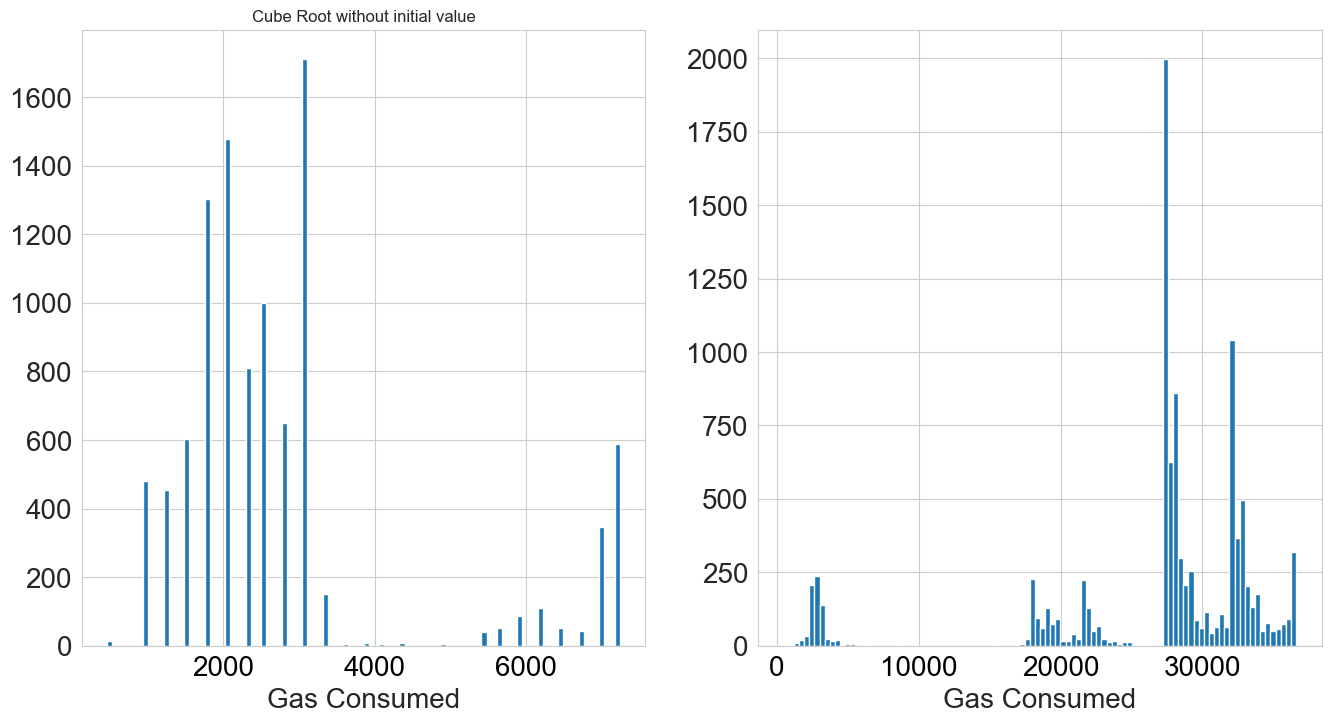

In [4]:
fig, axes = plt.subplots(1,2, figsize=(16, 8))

axes[0].hist(data.gas_used_initial_value, 100)
axes[0].set_title("Cube Root with initial value")
axes[1].hist(data.gas_used_noguess, 100)
axes[0].set_title("Cube Root without initial value")

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', colors='black')
    ax.set_xlabel("Gas Consumed", fontsize=20)

What's the relationship between initial guess and gas costs?

In [5]:
data_non_zero = data[data.input.apply(lambda x: mpz(x)) != 0]

data_non_zero["initial_value"] = data_non_zero.initial_value.apply(lambda x: mpz(x))
data_non_zero["cbrt_implementation_guess"] = data_non_zero.cbrt_implementation_guess.apply(lambda x: mpz(x))
data_non_zero["perc_diff_guess_output"] = 100 * (
    data_non_zero.cbrt_implementation_guess - data_non_zero.initial_value
    ) / data_non_zero.cbrt_implementation_guess
data_non_zero

,input,initial_value,cbrt_ideal,cbrt_implementation_noguess,cbrt_implementation_guess,gas_used_noguess,gas_used_initial_value,perc_diff_guess_output
0,1,2000000000000,1000000000000,1000000000000,1000000000000,36608,2039,-100.0
2,17447,49278845119011,25936234273164,25936234273164,25936234273164,28288,2039,-89.999999999997684
3,323644660184762007500615537352873936970,68657736569204787642368,6865773656920477287841792,6865773656920483309433178,6865773656920483309433178,22047,7240,99.0
4,40614,309362568095484,34373618677276,34373618677276,34373618677276,27508,3079,-800.0
5,90,6722107119835,4481404746557,4481404746557,4481404746557,32708,1779,-49.999999999988844
...,...,...,...,...,...,...,...,...
9995,33545,322509564446,32250956444602,32250956444602,32250956444602,27768,7240,99.000000000000057
9996,13908273289270956161,11108031709655463936,2404867049718409728,2404867049718409608,2404867049718409608,2807,2819,-361.89795444018927
9997,3309837219,9659370888716376,1490283449670558,1490283449670557,1490283449670557,17888,2819,-548.15662355048516
9998,154,10184205980833,5360108410965,5360108410965,5360108410965,32188,2039,-89.999999999990678


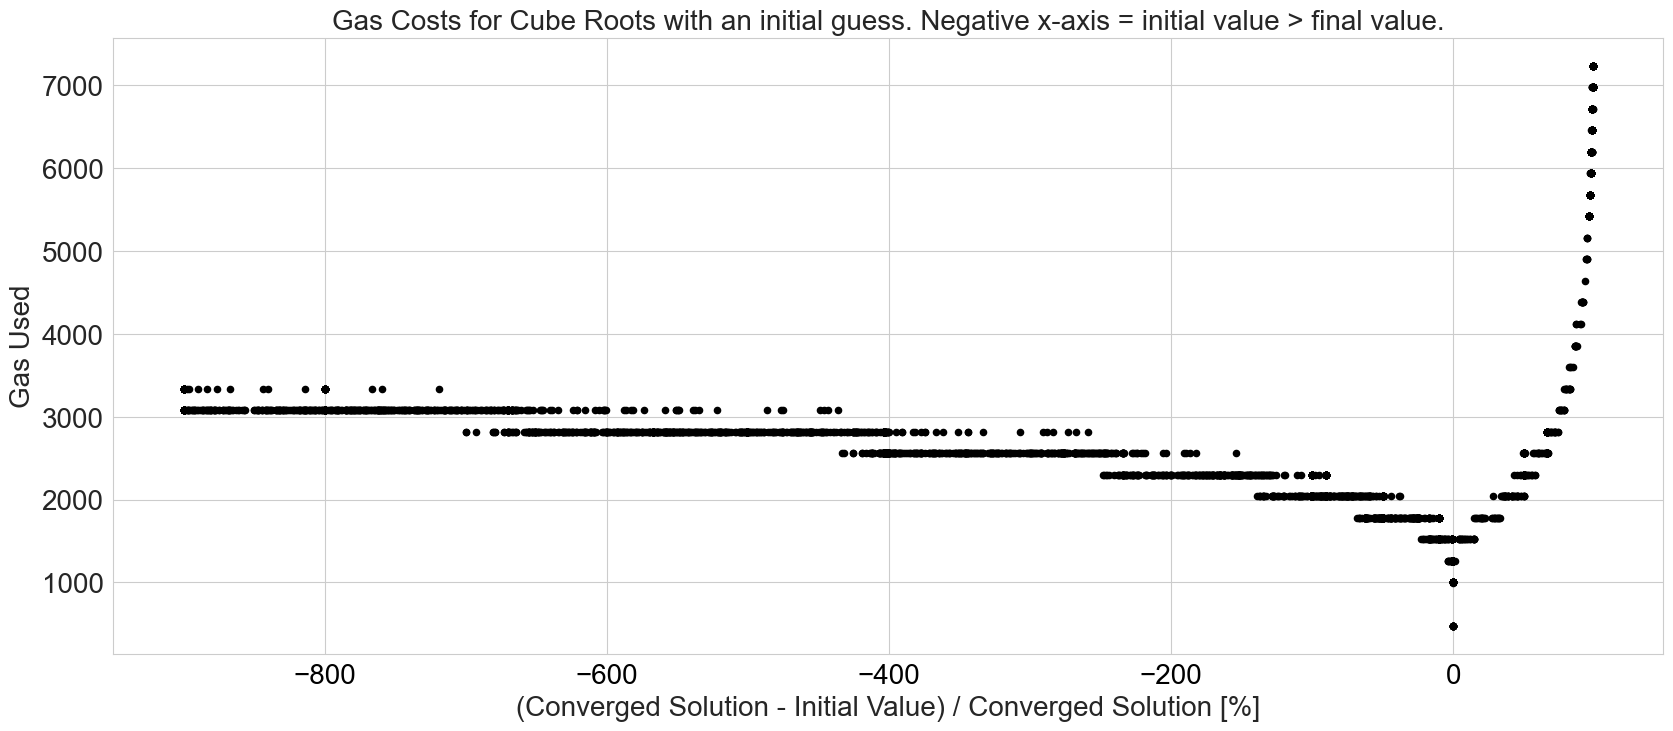

In [6]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.scatter(
    data_non_zero.perc_diff_guess_output,
    data_non_zero.gas_used_initial_value,
    s=20,
    color="black",
)

ax.set_xlabel("(Converged Solution - Initial Value) / Converged Solution [%]", fontsize=20)
ax.set_ylabel("Gas Used", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.set_title("Gas Costs for Cube Roots with an initial guess. Negative x-axis = initial value > final value.", fontsize=20);


The results above suggest that it's much better to overshoot the initial guess rather than undershoot it.